# Table of Contents 
* Data cleaning 
* Exploratory data analysis (EDA)
* Sanity check: Collinearity
* Hypothesis tests
* Machine learning
* Conclusion

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge



df = pd.read_csv('Airbnb Berlin.csv',encoding='latin-1')

C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (18,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data cleaning

In [2]:
# A glimpse of the data frame
df.tail()

,Review ID,review_date,Reviewer ID,Reviewer Name,Comments,Listing ID,Listing URL,Listing Name,Host ID,Host URL,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
456956,42820790.0,2015-08-16,29701880.0,MichÃ¨le,Unsere Ferien in dieser wunderschÃ¶nen Wohnung...,999465,https://www.airbnb.com/rooms/999465,Familyhome for your vacation,5494219,https://www.airbnb.com/users/show/5494219,...,2015-08-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f
456957,44757189.0,2015-08-29,32004492.0,Mira,"Die Wohnung in einer sehr guten Lage, besonder...",999465,https://www.airbnb.com/rooms/999465,Familyhome for your vacation,5494219,https://www.airbnb.com/users/show/5494219,...,2015-08-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f
456958,89152874.0,2016-07-27,23295563.0,Naomi,"Tiene todo lo que se necesita, es amplio y cÃ³...",9996186,https://www.airbnb.com/rooms/9996186,"Very nice apartment, central, Mitte",51352517,https://www.airbnb.com/users/show/51352517,...,2019-04-22,80.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f
456959,141452588.0,2017-04-03,4208925.0,Rowann,Isabella's place is perfect. It is in a great ...,9996186,https://www.airbnb.com/rooms/9996186,"Very nice apartment, central, Mitte",51352517,https://www.airbnb.com/users/show/51352517,...,2019-04-22,80.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f
456960,441547612.0,2019-04-22,4222195.0,Kay,Great located place. Kind host. Spacious and g...,9996186,https://www.airbnb.com/rooms/9996186,"Very nice apartment, central, Mitte",51352517,https://www.airbnb.com/users/show/51352517,...,2019-04-22,80.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f


In [3]:
# Check the data type for every feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456961 entries, 0 to 456960
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Review ID              452805 non-null  float64
 1   review_date            452805 non-null  object 
 2   Reviewer ID            452805 non-null  float64
 3   Reviewer Name          452805 non-null  object 
 4   Comments               452597 non-null  object 
 5   Listing ID             456961 non-null  int64  
 6   Listing URL            456961 non-null  object 
 7   Listing Name           456756 non-null  object 
 8   Host ID                456961 non-null  int64  
 9   Host URL               456961 non-null  object 
 10  Host Name              456913 non-null  object 
 11  Host Since             456913 non-null  object 
 12  Host Response Time     398194 non-null  object 
 13  Host Response Rate     398194 non-null  object 
 14  Is Superhost           456913 non-nu

The feature <b>Price</b> seems to be an object. This has to be changed  to float

In [4]:
# Change Price_column from object to float

df['Price'].replace(to_replace=r'\,',value='' ,regex=True,inplace=True)
df['Price'] = df['Price'].astype(float)

# Check the statistic for Price-column
df['Price'].describe()

count    456961.000000
mean         69.150667
std          90.638069
min           0.000000
25%          37.000000
50%          53.000000
75%          80.000000
max        9000.000000
Name: Price, dtype: float64

In [5]:
# Change graphic coder set Neighbourhood-column and Neighborhood Group-column
df['neighbourhood'] = df['neighbourhood'].map(lambda x: x.encode('latin-1').decode('utf-8'))
df['Neighborhood Group'] = df['Neighborhood Group'].map(lambda x: x.encode('latin-1').decode('utf-8'))

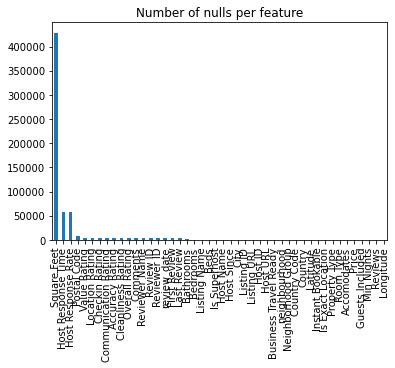

In [6]:
# Check number of nulls for every feature
df.isnull().astype(int).sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of nulls per feature')
plt.show()

There are a lot of null values for Square feet feature. Let's try to replace the nulls with a value. First make a scatter plot to get a better picture of the relationship between Square feet and Price.

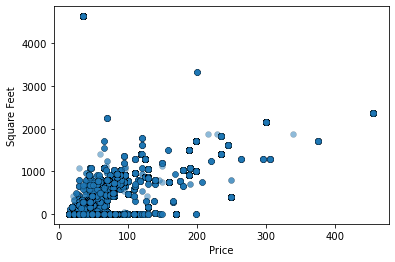

In [7]:
plt.scatter(df['Price'],df['Square Feet'],alpha=0.5,linewidths=0.2, edgecolors='Black')
plt.xlabel('Price')
plt.ylabel('Square Feet')
plt.show()

There appears to be some zeroes in Square feet and Price. These need to be fixed. Before that, the nulls will be replaced with the average square feet for respectively accomodates.
The square feet-price plot will be limited to up to 1500 EUR and square feet to 5000 sqft so that the plots get better exposure for the lower values

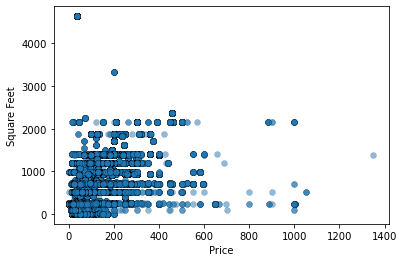

In [8]:
df['Square Feet'] = df.groupby(['Accomodates'])['Square Feet'].apply(lambda x: x.fillna(x.mean()))

df_reduced = df[(df['Price']<1500) & (df['Square Feet'] <5000)]
plt.scatter(df_reduced['Price'],df_reduced['Square Feet'],alpha=0.5,linewidths=0.2, edgecolors='Black')

plt.xlabel('Price')
plt.ylabel('Square Feet')
plt.show()

Now replace the zero square feet with average square feet for respectively accomodates

Text(0, 0.5, 'Square Feet')

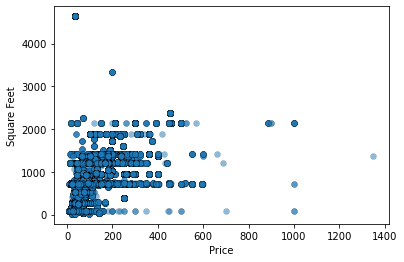

In [9]:
pd.options.mode.chained_assignment = None # remove the warning

# The average Square feet for each accomodate size
avg = df.groupby(['Accomodates'])['Square Feet'].mean()
lst_avg = avg.to_list()

# Replace the zero square feet with the average square feet for each accomodate size
for i, val in enumerate(lst_avg):
    df_reduced.loc[(df_reduced['Square Feet']==0) & (df_reduced['Accomodates']==i),'Square Feet'] = val

# Get all the square feet where the price is zero  
sqft_with_price_zero = df_reduced.loc[(df_reduced['Price']==0)]['Square Feet'].unique()

# Get the average price for the square feet with price zero and givet that value to the square feet with zero price
for i in range((len(sqft_with_price_zero))):
    price = df_reduced.groupby('Square Feet')['Price'].mean().loc[sqft_with_price_zero[i]-1:sqft_with_price_zero[i]+1].mean()
    df_reduced.loc[df_reduced['Square Feet'] == sqft_with_price_zero[i],'Price'] = price    
    

plt.scatter(df_reduced['Price'],df_reduced['Square Feet'],alpha=0.5,linewidths=0.2, edgecolors='Black')

plt.xlabel('Price')
plt.ylabel('Square Feet')


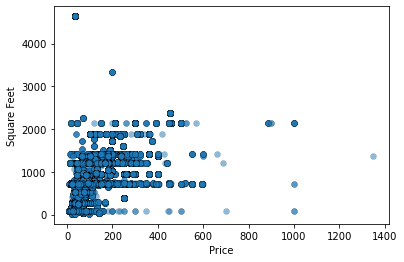

In [10]:
plt.scatter(df_reduced['Price'],df_reduced['Square Feet'],alpha=0.5,linewidths=0.2, edgecolors='Black')
plt.xlabel('Price')
plt.ylabel('Square Feet')
plt.show()

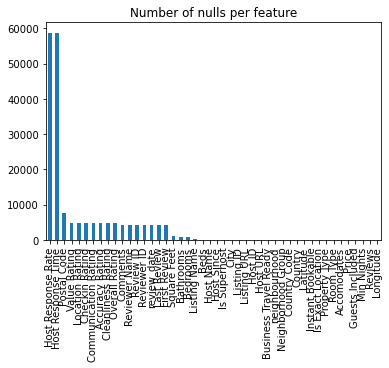

In [11]:
# Check for number of nulls for respectively featues again

df.isnull().astype(int).sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of nulls per feature')
plt.show()

Number of nulls for square feet has been reduced. The rates are not be included in the model so no need to clean them.


# Exploratory data analysis (EDA)

Time to explore the data set!

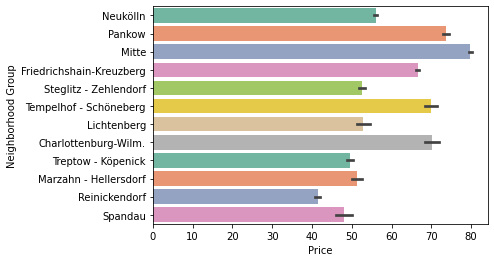

In [12]:
df['Neighborhood Group']
sns.barplot(y=df['Neighborhood Group'],x=df['Price'],palette='Set2')
plt.show()

The barplot presents the average prices for respectively area. Some areas are pricier than other as expected. 

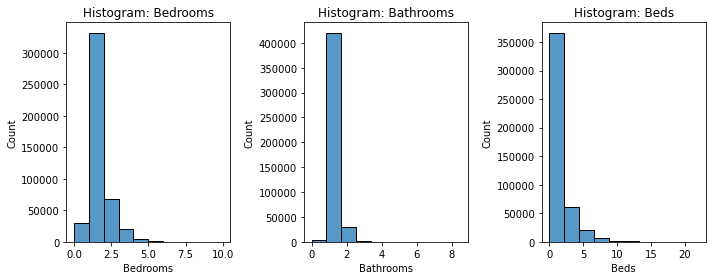

In [13]:
figure, axes = plt.subplots(1,3,figsize=(10,4))
sns.histplot(x='Bedrooms',data=df,bins=10,ax=axes[0])
sns.histplot(x='Bathrooms',data=df,bins=10,ax=axes[1])
sns.histplot(x='Beds',data=df,bins=10,ax=axes[2])

axes[0].set_title('Histogram: Bedrooms')
axes[1].set_title('Histogram: Bathrooms')
axes[2].set_title('Histogram: Beds')
plt.tight_layout()

From the histograms it looks like the the hosts prefer smaller companies. Many hosts provide one bedroom with one bed. One Bathroom is very most common among the hosts.

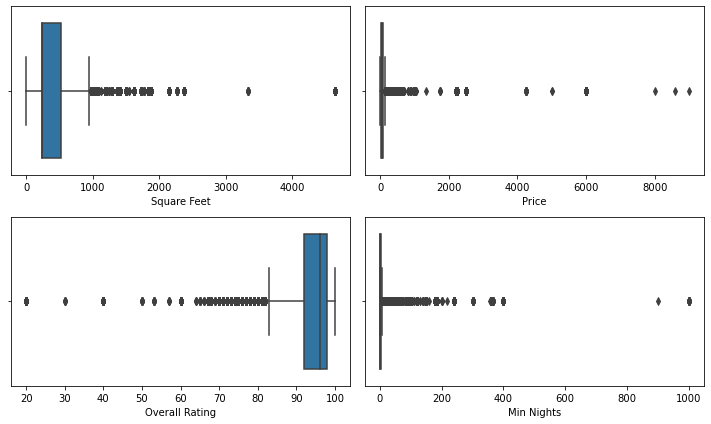

In [14]:
figure, axes = plt.subplots(2,2,figsize=(10,6))
sns.boxplot(x='Square Feet',data=df,ax=axes[0][0])
sns.boxplot(x='Price',data=df,ax=axes[0][1])
sns.boxplot(x='Overall Rating',data=df,ax=axes[1][0])
sns.boxplot(x='Min Nights',data=df,ax=axes[1][1])
plt.tight_layout()

Most of the hosts (75%) provide a square feed of around 600 sqft or less. Majority of the hosts (75%) have a Overrall rating of more than 90, which is positive. There seems to be some extreme outliers for Price and Min Nights. 1000 nights as minimum nights sounds not serious. The host that charge 9000 EUR provides only 2 beds which is too expensive for a regular traveler. The data set will be limited to price max 1500 EUR, max 1000 sqft and max 50 min nights.
 

# Sanity check: Collinearity

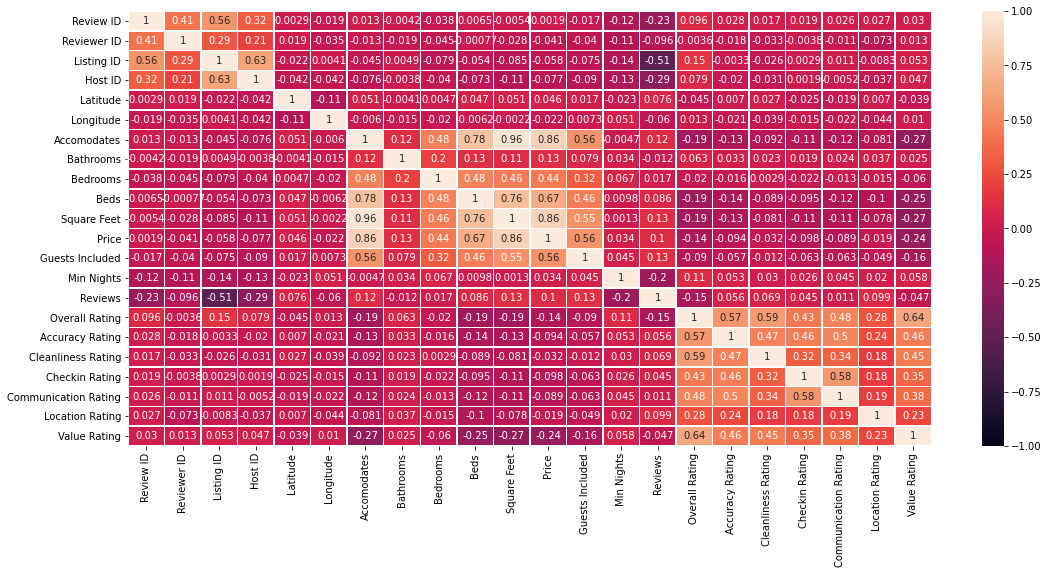

In [15]:
df_reduced = df_reduced[(df_reduced['Price']<1500) & (df_reduced['Square Feet'] <1000)  & (df_reduced['Min Nights'] <50)]

plt.figure(figsize=(18,8))
sns.heatmap(df_reduced.corr(method='spearman'),vmin=-1,vmax=1,annot_kws={'size':10},annot=True,linewidths=0.5)
plt.show()


There appears to be some high correlations for some of the features. High correlation is called collinear and one way to determine collinear is to calculate VIF.

In [16]:
X = df_reduced[['Square Feet','Guests Included','Bedrooms','Bathrooms','Min Nights','Accomodates','Beds']]
vif = pd.DataFrame()
X_vif = X.dropna()
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns
vif

,VIF Factor,features
0,31.233828,Square Feet
1,5.602106,Guests Included
2,7.425184,Bedrooms
3,6.122875,Bathrooms
4,1.560878,Min Nights
5,47.401500,Accomodates
6,8.837686,Beds


Two features have a VIF factor higher than 10. A high VIF factor means that the variable is very linearly related to other variable. The coefficient can have unexpected values and inflated standard errors. Let's see how the VIF changes if one of the features are removed.

In [17]:
X = df_reduced[['Square Feet','Guests Included','Bedrooms','Bathrooms','Min Nights','Beds']]
vif = pd.DataFrame()
X_vif = X.dropna()
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns
vif

,VIF Factor,features
0,10.091349,Square Feet
1,5.394324,Guests Included
2,7.323470,Bedrooms
3,5.888454,Bathrooms
4,1.559615,Min Nights
5,7.438384,Beds


The VIF factor for Square Feet got reduced but is still slightly over 10. If we think about it, <i>Beds</i>, <i>Bedrooms</i> and <i>Square feet</i> should correlate with each other. If there is a bedroom then there is at least one bed. And bedrooms require bigger space. Let's try to remove <i>Beds</i> and see how VIF becomes.


In [18]:
X = df_reduced[['Square Feet','Guests Included','Bedrooms','Bathrooms','Min Nights']]
vif = pd.DataFrame()
X_vif = X.dropna()
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns
vif

,VIF Factor,features
0,6.763787,Square Feet
1,5.357955,Guests Included
2,6.861041,Bedrooms
3,5.884172,Bathrooms
4,1.556988,Min Nights


All the features have a VIF that is below 10. Depending on the buisness case there are different acceptance level for VIF. All VIF below 10 will be acceptable for this project.

# Hypothesis tests

Two hypothesis tests will be performed: 
1.  Is the renting price equal between the groups <i>Good ratings</i> (>=70) and <i>Mediocre ratings</i> (<70)
2.  Is the renting price the same for the groups <i>Two or less beds</i> and <i>More than two beds</i>

The groups are equal for null hypothesis and not equal for alternative hypothesis. Significant value is set to 5%

Box plots for the two test will be presented first to see the variation between the groups and then hypothesis tests will be performed.

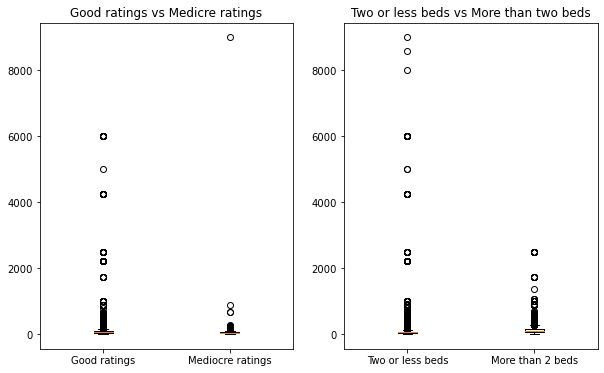

In [19]:
df['Two or less beds'] = df.apply(lambda x: x['Price'] if x['Beds']<=2 else None, axis=1)
df['More than 2 beds'] = df.apply(lambda x: x['Price'] if x['Beds']>2 else None,axis=1)

df['price_rating_good'] = df.apply(lambda x: x['Price'] if x['Overall Rating']>=70 else None, axis=1)
df['price_rating_mediocre'] = df.apply(lambda x: x['Price'] if x['Overall Rating']<=70 else None,axis=1)

fig, axes = plt.subplots(1,2, figsize=(10,6))
axes[0].boxplot([df['price_rating_good'].dropna(),df['price_rating_mediocre'].dropna()],
            labels=['Good ratings','Mediocre ratings'])

axes[1].boxplot([df['Two or less beds'].dropna(),df['More than 2 beds'].dropna()],
            labels=['Two or less beds','More than 2 beds'])

axes[0].set_title('Good ratings vs Medicre ratings')
axes[1].set_title('Two or less beds vs More than two beds')
plt.show()

In [20]:
import scipy.stats as stats
z, p = stats.ttest_ind(df['price_rating_good'].dropna(),df['price_rating_mediocre'].dropna(),equal_var=False)
print('-------Good ratings vs Mediocre ratings-------\n')
if p<0.05:
    print('P-value is below 5%.\nThere is a statisical significance and \
          we can reject the null hypothesis. There seems to be a difference between the groups\n')
else:
    print('P-value is greater than 5%.\nThere is no statistical significance and we cannot reject the null hypothesis. There seems to be no difference between the groups\n')
    
    
z, p = stats.ttest_ind(df['Two or less beds'].dropna(),df['More than 2 beds'].dropna(),equal_var=False)
print('-------Two or less beds vs More than two beds-------\n')
if p<0.05:
    print('P-value is below 5%.\nThere is a statisical significance and\
 we can reject the null hypothesis. There seems to be a difference between the groups')
else:
    print('P-value is greater than 5%.\nThere is no statistical significance and we cannot reject the null hypothesis, there seems to be a difference between the groups')

-------Good ratings vs Mediocre ratings-------

P-value is greater than 5%.
There is no statistical significance and we cannot reject the null hypothesis. There seems to be no difference between the groups

-------Two or less beds vs More than two beds-------

P-value is below 5%.
There is a statisical significance and we can reject the null hypothesis. There seems to be a difference between the groups


# Machine learning 

The aim is to make a machine learning model that can predict the renting price. Following numerical and categorical features will be used:
###### Numerical
* Square Feet
* Guests Included
* Bedrooms
* Bathrooms
* Min Nights

###### Categorical
* Neighborhood Group
* Is Superhost
* Property Type
* Room Type
* Instant Bookable
* Business Travel Ready

These features have not been included:
###### Numerical
* Review ID <i>(Review should not influence the renting price)</i>
* Reviewer ID <i>(Reviewer should not influence the renting price)</i>
* Listing ID <i>(Listing should not influence the renting price)</i>
* Host ID <i>(Host should not influence the renting price)</i>
* Latitude <i>(Knowing the exact position is not of interest. Risk for overfit)</i>
* Longitude <i>(Knowing the exact position is not of interest. Risk for overfit)</i>
* Accomodates <i>(Caused collinear)</i>
* Beds  <i>(Caused collinear)</i>
* Overall Rating <i> (Rating should not influence the renting price)</i>
* Accuracy Rating <i> (Rating should not influence the renting price)</i> 
* Cleanliness Rating <i> (Rating should not influence the renting price)</i>
* Checkin Rating <i> (Rating should not influence the renting price)</i>
* Communication Rating <i> (Rating should not influence the renting price)</i>
* Location Rating <i> (Rating should not influence the renting price)</i>
* Value Rating <i> (Rating should not influence the renting price)</i>

###### Categorical
* review_date <i>(Redundant)</i>
* Reviewer Name<i>(Redundant)</i>
* Comments <i>(Redundant)</i>
* Listing URL <i>(Redundant)</i>
* Listing Name <i>(Redundant)</i>
* Host URL <i>(Redundant)</i>
* Host Name <i>(Redundant)</i> 
* Host Since <i>(Should not influence so much of the price)</i>
* Host Response Time <i>(Should not influence so much of the price)</i>
* Host Response Rate <i>(Should not influence so much of the price)</i>
* neighbourhoodCity <i>(Neighbourhood group feature will be used which is enough)</i>
* Postal Code <i>(Neighbourhood group feature will be used which is enough)</i>
* Country Code <i>(Data set is only from Germany so this is redundant)</i>
* Country <i>(Data set is only from Germany so this is redundant)</i>
* Is Exact Location <i>(Risk for overfit)</i>
* First Review <i>(should not influence the renting price)</i>
* Last Review <i>(should not influence the renting price)</i>


Machine learning models Linear Regression, Ridge Regression and Gradient Boosting Regressor will be used for predicting the renting price. The nulls will be dropped from the data set. Categorical variables will be converted to dummy variables. <i>Log1p</i> will be used to make the data set more linear. This is performed after <i>train_test_split</i> in order to avoid data leakage. <i>Cross_val_score</i> will be used as first step to get a quick glimpse of how the models perform on the data set.

In [21]:
def get_scores(model_name,ml_model ,X, y, kfolds):
    """
    Get the scores, average score and the standard deviation
    for the requested model.
    """
        
    scores = cross_val_score(ml_model, X, y, cv=kfolds)
    print('%s score: '%(model_name),scores.round(3))
    print('%s average: '%(model_name),scores.mean().round(3))
    print('%s standard devaition: '%(model_name),scores.std().round(3))
    print('\n')
    
    return None
    
    

df_reduced = df_reduced.dropna()
X1 = pd.get_dummies(df_reduced[['Neighborhood Group','Is Superhost','Property Type', 'Room Type','Instant Bookable','Business Travel Ready']]
                    ,drop_first=True)

X = df_reduced[['Square Feet','Guests Included','Bedrooms','Bathrooms','Min Nights']]

X = pd.merge(X,X1,left_index=True,right_index=True)
y = df_reduced['Price']


kfolds =KFold(n_splits=5, shuffle=True ,random_state=37)

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=42)

X_test = np.log1p(X_test).values
y_test = np.log1p(y_test).values
X_train = np.log1p(X_train).values
y_train = np.log1p(y_train).values

lr = LinearRegression()
ridge = Ridge()
gbr = GradientBoostingRegressor()

get_scores('LinearRegression', lr, X, y, kfolds)
get_scores('Ridge', ridge, X, y, kfolds)
get_scores('GradientBoostingRegressor', gbr, X, y, kfolds)


LinearRegression score:  [0.59  0.587 0.591 0.58  0.576]
LinearRegression average:  0.585
LinearRegression standard devaition:  0.006


Ridge score:  [0.59  0.587 0.591 0.58  0.576]
Ridge average:  0.585
Ridge standard devaition:  0.006


GradientBoostingRegressor score:  [0.794 0.8   0.811 0.8   0.806]
GradientBoostingRegressor average:  0.802
GradientBoostingRegressor standard devaition:  0.006




Linear regression and ridge regression have same performance. Gradient Boosting Regressor perform much better than the first two models.
Gridge search CV were performed on another notebook for ridge regression and Gradient Boosting Regressor model to find better hyperparameter values. 

In [22]:
def get_score(model,X_test,y_test,name):
    
    """
    Get the score and the error for requested model.
    Return the results as a data frame.
    """
    y_pred = model.predict(X_test)
    r2.append(r2_score(y_test,y_pred))
    mae.append(mean_absolute_error(y_test,y_pred))
    mse.append(mean_squared_error(y_test,y_pred))
    model_name.append(name)
    df = pd.DataFrame(zip(model_name,r2,mae,mse),columns=['Model name','R2','MAE','MSE'])
    return df
    

r2 = []
mae = []
mse = []
model_name =[]    
    
gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 6, min_samples_leaf= 3).fit(X_train,y_train)
#y_pred = gbr.predict(X_test)


ridge = Ridge(alpha= 0.01).fit(X_train,y_train)
#y_pred = ridge.predict(X_test)


lr = LinearRegression().fit(X_train,y_train)
#y_pred = lr.predict(X_test)





In [23]:
df=get_score(gbr,X_test,y_test,'Gradient Boosting Regressor')
df=get_score(lr,X_test,y_test,'Linear Regression')
df=get_score(ridge,X_test,y_test,'Ridge Regression')
df

,Model name,R2,MAE,MSE
0,Gradient Boosting Regressor,0.894617,0.053299,0.017222
1,Linear Regression,0.690511,0.131162,0.050578
2,Ridge Regression,0.690511,0.131163,0.050578


Gradient Boosting Regressor model looks to be a better model among the three tested models with R2: 0.9. With the given parameter for Ridge Regression model and the data set that were used. The model performed exactly the same as Linear regression model. The extra parameter penalty called regularization in Ridge regression model is to avoid overfitting. For this case the regularization is very low which explains why Rigde and Linear models are similar.

# Conclusion
*  Cleaned the data for data exploraroty analysis
*  Sanity check of the variable has collinearity were checked using VIF.
*  Two hypothesis tests were performed to see if the groups have same renting price. The groups were <i>Good ratings</i> vs <i>Mediocre ratings</i> and <i>Two or less beds</i> vs <i>More than two beds</i>
* Three differnt machine learning models were built: Gradient Boosting Regressor, Linear Regression	and Ridge Regression.
Gradient Boosting Regressor performed best with a R2 of 0.9. 
